# Linear Regression from Scratch

## Overview 📈
In this project, I’m implementing a custom **Linear Regression** model using Python and NumPy, demonstrating how linear regression works under the hood. The model uses **Gradient Descent** to iteratively find the best-fit line for a given dataset.

### Key Concepts:
- **Linear Regression**: A method for modeling the relationship between one or more input variables (features) and an output variable (target).
  
- **Gradient Descent**: An optimization technique used to minimize the model’s error by adjusting weights and bias.
  
- **Mean Squared Error (MSE)**: A common loss function used in regression tasks to measure how well the model’s predictions match the actual values.

---

## Objective 🎯
The goal of this project is to:
1. Implement a custom Linear Regression class.
   
2. Use gradient descent to optimize the model's parameters.
   
3. Visualize the loss function to see how well the model learns over time.

---

## Linear Regression Explanation 🧠

### Linear Regression Formula
In a linear regression model, we predict the output `y` using a linear combination of input features `X`:

$$
y_{\text{pred}} = X \cdot w + b
$$

Where:
- `X`: Matrix of input features.
- `w`: Weights for each feature.
- `b`: Bias term.
- `y_pred`: Predicted output.

---

### Loss Function (Mean Squared Error)
To measure how well our model is predicting, we use the **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - y_{\text{pred}, i})^2
$$

Where:
- `n`: Number of samples.
- `y_i`: Actual output for the \( i \)-th sample.
- `y_pred,i`: Predicted output for the \( i \)-th sample.

---

### Gradient Descent Optimization ⚙️

<img src="./figures/gradient.png" alt="gradient" width="700" hight= "400"/> <img src="./figures/gradient 2.png" alt="gradient" width="700" hight= "400"/>




In linear regression, our goal is to minimize the difference between the actual target values \(y\) and the predicted values \(y_pred\). We achieve this by finding the optimal values for the weights \(w\) and the bias \(b\) through an iterative process called **Gradient Descent**.

#### Understanding Gradient Descent

Gradient Descent is an optimization algorithm that adjusts the parameters of our model to minimize the loss function. In our case, the loss function is the **Mean Squared Error (MSE)**, which quantifies how well our model's predictions match the actual values. The steps to implement Gradient Descent involve calculating the gradients of the loss function with respect to the parameters \(w\) and \(b\).

> #### Gradients Calculation

1. **Weight Gradient (\(dw\))**:
   The gradient with respect to the weights \(w\) is calculated as follows:

   $$
   dw = -\frac{2}{n} X^T (y - y_{\text{pred}})
   $$

   - **Components**:
     - X^T is the transpose of the feature matrix \(X\), which allows us to align the dimensions for matrix multiplication.
     - \((y - y_pred)\) is the error vector, representing the difference between actual and predicted values.
     - The term \(-2/n\) is a scaling factor that normalizes the gradient by the number of samples \(n\) and adjusts the magnitude of the gradient.

   - **Interpretation**:
     - This gradient \(dw\) indicates the direction and rate at which the weights \(w\) should be adjusted to minimize the loss. A positive \(dw\) means we need to decrease \(w\), while a negative \(dw\) suggests increasing \(w\).

2. **Bias Gradient (\(db\))**:
   The gradient with respect to the bias \(b\) is given by:

   $$
   db = -\frac{2}{n} \sum (y - y_{\text{pred}})
   $$

   - **Components**:
     - The summation \(sum (y - y_pred)\) computes the total error across all samples.
     - Similar to \(dw\), the term \(-2/n\) normalizes the bias gradient.

   - **Interpretation**:
     - The gradient \(db\) reflects how much we need to adjust the bias \(b\) to minimize the loss. A positive \(db\) indicates that we should decrease the bias, while a negative \(db\) suggests an increase.


> #### Parameter Updates

Once we have calculated the gradients \(dw\) and \(db\), we update the parameters \(w\) and \(b\) using the learning rate:

1. **Updating Weights**:

   $$
   w = w - \text{learning\_rate} \times dw
   $$

   - The learning rate determines the size of the step we take in the direction of the negative gradient. A small learning rate can make the convergence slow, while a large one might cause overshooting, preventing convergence.

2. **Updating Bias**:

   $$
   b = b - \text{learning\_rate} \times db
   $$

   - Similar to weights, this update adjusts the bias based on how the error changes with respect to the bias term.

#### Iterative Process

The above calculations are repeated for a specified number of iterations (epochs). In each iteration:
- We compute the gradients \(dw\) and \(db\),
- Update the weights and bias,
- And typically monitor the loss to observe convergence.

This process continues until we achieve an acceptable level of error or until the loss stabilizes.
---

## Implementation 🛠️

Below is the code for implementing Linear Regression using gradient descent. The `LinearRegression` class includes methods to:
1. **Fit the model**: Learn optimal weights and bias by minimizing the error
   .
2. **Predict**: Make predictions on new data using the learned weights and bias.
   
3. **Calculate Loss**: Compute the MSE to evaluate model performance during training.

---

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initialize the Linear Regression model.

        Parameters:
        learning_rate (float): The step size for gradient descent (default is 0.01).
        n_iters (int): The number of iterations for the gradient descent algorithm (default is 1000).
        """
        self.lr = learning_rate  # Learning rate controls the magnitude of weight updates.
        self.n_iters = n_iters  # Number of iterations to run gradient descent.
        self.weights = None  # Weights to be learned during training, initialized to None.
        self.bias = None  # Bias term to be learned during training, initialized to None.
        self.loss_history = []  # List to store the loss value at each iteration.

    def fit(self, X, y):
        """
        Train the Linear Regression model using gradient descent.

        Parameters:
        X (array-like): The feature matrix of training samples.
        y (array-like): The target values (labels) for the training samples.
        """
        n_samples, n_features = X.shape # Get the number of samples and features
        self.weights = np.zeros(n_features) # Initialize weights to zeros and bias to zero
        self.bias = 0
        # Store the input features and target values
        self.X = X
        self.y = y

        # Perform gradient descent for the specified number of iterations
        for i in range(self.n_iters):
            self.update_weights() # Update the weights and bias using gradient descent.
            # Calculate the loss for the current model
            loss = self.calculate_loss() 
            self.loss_history.append(loss)
            # Print the loss value every 100 iterations for monitoring
            if i % 100 == 0:  
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def update_weights(self):
        """
        Update the weights and bias using the gradients computed from the current model.

        This function uses the gradient descent algorithm to update the model's parameters
        based on the current predictions and the true values.
        """
        # Predict the current output using the current weights
        y_predicted = self.predict(self.X)
        # Calculate gradients for weights (dw) and bias (db)
        dw = - (2 * (self.X.T).dot(self.y - y_predicted)) / self.X.shape[0]
        db = - 2 * np.sum(self.y - y_predicted) / self.X.shape[0]

        # Update the weights and bias using the computed gradients
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
        """
        Predict the target values for the given input data.

        Parameters:
        X (array-like): The feature matrix of test samples.

        Returns:
        np.array: The predicted target values for each test sample.
        """
        # Calculate the predicted output as a linear combination of input features and weights
        return np.dot(X, self.weights) + self.bias

    def calculate_loss(self):
        """
        Calculate the Mean Squared Error (MSE) loss between the predicted and true values.

        Returns:
        float: The calculated MSE loss for the current model.
        """
        # Calculate the mean squared error loss
        y_predicted = self.predict(self.X)
        mse = np.mean((self.y - y_predicted) ** 2)
        return mse  # Return the computed mean squared error (MSE)

## Generating Synthetic Data 📊

In this section, we will create synthetic data for our linear regression model. This dataset will consist of a single feature (`X`) and a target variable (`y`). The relationship between `X` and `y` will be defined by the equation:

$$
y = 4 + 3X + \text{noise}
$$

Where:
- **noise** is a random noise term that simulates real-world variability in our observations.
- We will generate 100 samples of `X` values uniformly distributed between 0 and 2, and then calculate the corresponding `y` values based on our linear equation.

Let's proceed to generate the data!

In [25]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 100 random samples for feature X
X = 2 * np.random.rand(100, 1)

# Generate the target variable y using the linear equation with noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Display the first 10 samples of X and y
print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

X: [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
y: [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]
 [5.29307969]
 [5.82639572]
 [8.67878666]
 [6.79819647]
 [7.74667842]]


## Reshape y to be a 1D Array 🔄

In this step, we need to reshape the target variable `y` into a 1-dimensional array. This is important for compatibility with our linear regression model, as many machine learning libraries expect the target variable to be a flat array rather than a 2D array.


In [26]:
# Reshape y to be a 1D array
y = y.flatten()

## Fitting the Model 🛠️

In this section, we will fit our custom `LinearRegression` model to the synthetic dataset we generated earlier. This process involves teaching the model how to predict the target variable `y` based on the input feature `X`. 

### Step 1: Initialize the Model

First, we need to create an instance of our `LinearRegression` class. When initializing the model, we will specify two key parameters:

- **Learning Rate** (`learning_rate=0.1`): This is a crucial hyperparameter that determines the size of the steps taken towards the minimum of the loss function during gradient descent. A smaller learning rate might lead to a more precise convergence but will require more iterations, while a larger learning rate may speed up the process but could overshoot the minimum.

- **Number of Iterations** (`n_iters=1000`): This parameter defines how many times the gradient descent algorithm will run. Each iteration allows the model to update its weights and bias, gradually improving its predictions.

### Step 2: Fit the Model to the Data

Next, we call the `fit` method on our model, passing in the feature set `X` and the target variable `y`. The `fit` method will handle the following:

1. **Weight and Bias Initialization**: The model initializes its weights and bias to zero.
2. **Gradient Descent Process**: Over the specified number of iterations, the model calculates the predicted outputs, evaluates the loss using the Mean Squared Error (MSE), computes the gradients of the loss with respect to the weights and bias, and updates these parameters accordingly.


In [27]:
# Fitting the model
model = LinearRegression(learning_rate=0.1, n_iters=1000)
model.fit(X, y)

Iteration 0: Loss = 17.9354
Iteration 100: Loss = 0.8069
Iteration 200: Loss = 0.8066
Iteration 300: Loss = 0.8066
Iteration 400: Loss = 0.8066
Iteration 500: Loss = 0.8066
Iteration 600: Loss = 0.8066
Iteration 700: Loss = 0.8066
Iteration 800: Loss = 0.8066
Iteration 900: Loss = 0.8066


## Plotting the Loss 📉

Visualizing the loss function is an essential step in understanding how well our linear regression model is learning over time. By plotting the loss (Mean Squared Error) against the number of iterations, we can see if the model is effectively minimizing the error and converging towards an optimal solution.

### Why Plot the Loss?

- **Monitoring Progress**: The loss plot allows us to observe how the model's predictions improve with each iteration. A decreasing trend in the loss indicates that the model is learning.
- **Detecting Overfitting or Underfitting**: If the loss decreases steadily and then starts to increase, it may indicate overfitting, while a flat line suggests underfitting.

### Step-by-Step Explanation

1. **Function Definition**: We define a function called `plot_loss`, which takes the `loss_history` (a list of loss values recorded during training) as input.

2. **Plotting**: Inside the function, we use Matplotlib to create a plot:
   - The x-axis represents the number of iterations (we’ll label it as “Iterations (x100)” since we will show the iterations in groups of 100 for clarity).
   - The y-axis represents the Mean Squared Error (MSE), which quantifies the error in our model's predictions.

3. **Displaying the Plot**: Finally, we use `plt.show()` to display the plot.


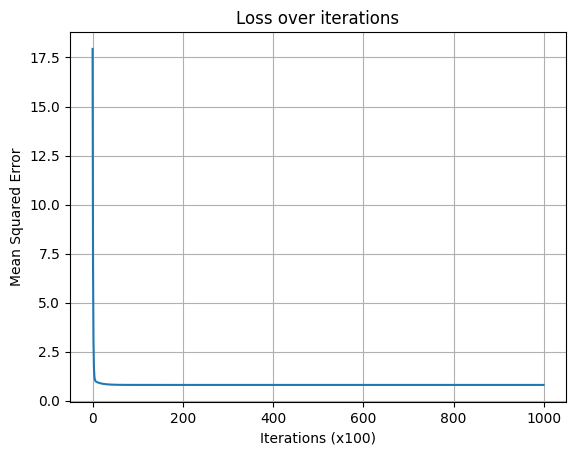

In [28]:
# Function to plot the loss
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.title("Loss over iterations")
    plt.xlabel("Iterations (x100)")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.show()

# Plot the loss history
plot_loss(model.loss_history)

## Making Predictions 🔮

Once we have trained our linear regression model and optimized its parameters (weights and bias), we can use it to make predictions on new or existing data. This is a crucial step in evaluating the effectiveness of our model.

### What Are Predictions?

In the context of linear regression, predictions refer to the estimated values of the target variable (`y`) based on input features (`X`). The model applies the learned relationship between `X` and `y` to predict outcomes for the given input data.

### How Do We Make Predictions?

After fitting the model using the training data, we can call the `predict` method from our `LinearRegression` class. This method takes the input feature matrix `X` and calculates the predicted output using the following linear equation:

$$
y_{\text{pred}} = X \cdot w + b
$$

Where:
- `X`: The input feature matrix.
- `w`: The optimized weights learned during training.
- `b`: The optimized bias learned during training.
- `y_pred`: The predicted output values.


In [29]:
# Making predictions using the trained model
predictions = model.predict(X)

## Visualizing the Predictions 📊

Visualizing the predictions made by our linear regression model is an important step in evaluating its performance. By comparing the actual target values with the predicted values, we can assess how well the model fits the data.

### Why Visualize Predictions?

- **Assess Model Performance**: A visual representation allows us to see how closely the predicted values align with the actual values. This helps us understand the model's effectiveness.
- **Identify Patterns**: We can observe patterns, trends, or discrepancies in the data that the model might not capture, which could indicate areas for improvement.

### Plotting the Predictions

In this section, we will create a scatter plot to visualize both the actual data points and the predicted line generated by our linear regression model. The actual data points will be represented as blue dots, while the predicted line will be shown in red.


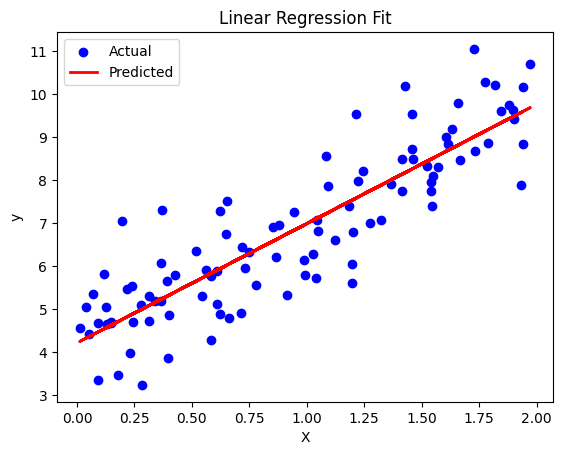

In [30]:
# Visualizing the predictions
plt.scatter(X, y, color='blue', label='Actual')  # Scatter plot for actual values
plt.plot(X, predictions, color='red', label='Predicted', linewidth=2)  # Line for predicted values
plt.title("Linear Regression Fit")  # Title of the plot
plt.xlabel("X")  # Label for x-axis
plt.ylabel("y")  # Label for y-axis
plt.legend()  # Show legend
plt.show()  # Display the plot

# When to Use Linear Regression 📈

Linear Regression is a fundamental statistical technique widely used in predictive modeling. Here are some scenarios where Linear Regression is particularly effective:

- **Predicting Continuous Outcomes**: Linear regression is ideal for predicting continuous dependent variables, such as prices, sales, or any measurable quantities based on independent variables.

- **Relationships with Linear Trends**: It is most effective when the relationship between the independent and dependent variables is approximately linear. This can be checked using scatter plots.

- **Simplicity and Interpretability**: Linear regression is straightforward, making it a good starting point for understanding relationships in data before moving to more complex models.

- **Low Multicollinearity**: It performs best when the independent variables are not highly correlated with each other (i.e., low multicollinearity), as this can distort the results.

- **Small to Moderate Sample Sizes**: Linear regression generally requires a sufficient amount of data to provide reliable estimates. Small sample sizes may lead to overfitting.

# Pros of Linear Regression ✅

- **Easy to Understand**: The concept of fitting a line to data is simple and intuitive, making linear regression easy to grasp for beginners.

- **Quick to Train**: Linear regression models are computationally inexpensive to train, leading to faster results.

- **Interpretable Coefficients**: The coefficients obtained in linear regression provide clear insights into the influence of each independent variable on the dependent variable.

- **Good Performance with Linear Relationships**: When the relationship between variables is linear, linear regression often performs very well.

- **Foundation for Advanced Techniques**: Understanding linear regression is essential for grasping more complex algorithms, as many build upon its principles.

# Cons of Linear Regression ❌

- **Assumes Linearity**: Linear regression assumes a linear relationship between the dependent and independent variables. If the true relationship is non-linear, the model may perform poorly.

- **Sensitive to Outliers**: Outliers can disproportionately influence the model’s coefficients, leading to inaccurate predictions.

- **Assumes Homoscedasticity**: Linear regression assumes that the variance of errors is constant across all levels of the independent variable. Violations of this assumption can affect the model’s validity.

- **Limited to Linear Relationships**: It cannot capture complex relationships between variables, which can be a limitation in many real-world applications.

- **Multicollinearity Issues**: When independent variables are highly correlated, it can lead to unstable estimates and make it difficult to determine the effect of each variable.

## Conclusion 🎯

Linear Regression is a powerful tool for predicting continuous outcomes and understanding relationships between variables. Its simplicity and interpretability make it a staple in data analysis, but it's important to ensure that the underlying assumptions are met for optimal performance.